# Getting Started

Variable Definition

In [1]:
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)


Importing Libraries





In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Loading data

In [3]:

data_set = pd.read_csv("https://raw.githubusercontent.com/ChiruhasBobbadi/CMPE255-final/main/DataSet/BlackFridaySales.csv")

Exploring Data


In [4]:

data_set.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data_set.shape

(550068, 12)

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Data preprocessing


Checking Null Values


In [7]:
data_set.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Percentage of null values in every fields


In [8]:
data_set.isnull().sum()/data_set.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

Unique elements in each attributes


In [9]:
data_set.nunique()


User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# Exploratory Data Analysis

## Purchase

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


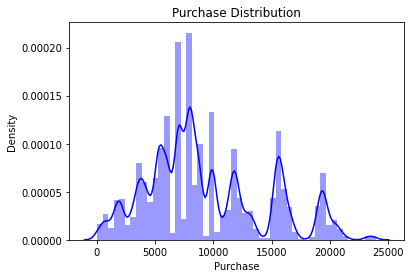

<Figure size 432x288 with 0 Axes>

In [10]:
sns.distplot(data_set["Purchase"],color='b')
plt.title("Purchase Distribution")
plt.show()
plt.savefig("/content/1.svg")

We can see that a lot of clients make repeated purchases in the same quantity. This might be due to the fact that during Black Friday, many people make large-scale purchases of discounted goods, which kind of follows a Gaussian Distribution.

In [11]:
data["Purchase"].skew()


NameError: ignored

In [ ]:
data["Purchase"].kurtosis()

In [ ]:
data["Purchase"].describe()

## Gender

In [ ]:
sns.countplot(data['Gender'])
plt.show()
plt.savefig("/content/2.svg")

In [ ]:
data['Gender'].value_counts(normalize=True)*100

In [ ]:
data.groupby("Gender").mean()["Purchase"]


## Marital Status

In [ ]:
sns.countplot(data['Marital_Status'])
plt.show()
plt.savefig("/content/3.svg")

In [ ]:
data.groupby("Marital_Status").mean()["Purchase"]


In [ ]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()


## City_Category


In [ ]:
sns.countplot(data['City_Category'])
plt.show()
plt.savefig("/content/4.svg")

In [ ]:

data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category vs Purchase Analysis")
plt.show()


## Stay_In_Current_City_Years

In [ ]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()
plt.savefig("/content/5.svg")

## Age

In [ ]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()
plt.savefig("/content/6.svg")

## Product_Category_1

In [ ]:

plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_1'])
plt.show()


It is clear that Product_Category_1 numbers 1,5 and 8 have more number of fields. But we don't know which product they correspond to.

## Product_Category_2

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_2'])
plt.show()


## Product_Category_3

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'])
plt.show()


# HeatMap

HeatMap is used to explore correlation between different fields in the dataset

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.show()
plt.savefig("/content/heatmap.svg")

We can observe that there are fields that have correlation

In [ ]:

df = data.copy()

## Encoding the categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()


In [ ]:

df['Gender'] = lr.fit_transform(df['Gender'])

In [ ]:
df['Age'] = lr.fit_transform(df['Age'])


In [ ]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [ ]:

df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')
df.isnull().sum()

In [ ]:
df.head()


In [ ]:
df.columns

In [ ]:
df = df.drop(["Stay_In_Current_City_Years"],axis=1)


# Splitting data into independent and dependent variables

In [ ]:
X = df.drop("Purchase",axis=1)

In [ ]:

y=df['Purchase']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)





In [ ]:
y_train

In [ ]:
y_test

# Regression Models

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression



In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

In [ ]:
lr.intercept_

In [ ]:

lr.coef_

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred.info()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


In [ ]:

mean_absolute_error(y_test, y_pred)

In [ ]:

mean_squared_error(y_test, y_pred)

In [ ]:

r2_score(y_test, y_pred)

In [ ]:

from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [ ]:

plt.scatter(y_test, y_pred,color='g')
plt.title("Actual purchase vs Predicted Purchase")
plt.xlabel("Actual Purchase")
plt.ylabel("Predicted Purchase")
plt.show()

##  Ridge Regression

In [ ]:
from sklearn.linear_model import Lasso,Ridge

In [ ]:
ridgeReg=Ridge(alpha=0.01,normalize=True)

ridgeReg.fit(X_train,y_train)



In [ ]:
ridgeReg.coef_
ridgeReg.intercept_

In [ ]:
ridge_y_pred=ridgeReg.predict(X_test)

In [ ]:
r2=r2_score(y_test,ridge_y_pred)
r2

In [ ]:
rmse1=np.sqrt(mean_squared_error(y_test,ridge_y_pred))


rmse1


In [ ]:
plt.scatter(y_test, ridge_y_pred,color='g')
plt.title("Actual purchase vs Predicted Purchase")
plt.xlabel("Actual Purchase")
plt.ylabel("Predicted Purchase")
plt.show()

## Lasso Regression

In [ ]:
lassoReg=Lasso(alpha=0.09,normalize=True)

lassoReg.fit(X_train,y_train)



In [ ]:
lassoReg.coef_

In [ ]:
lassoReg.intercept_

In [ ]:
lasso_y_pred=lassoReg.predict(X_test)

In [ ]:
r22=r2_score(y_test,lasso_y_pred)
r22

In [ ]:
rmse2=np.sqrt(mean_squared_error(y_test,lasso_y_pred))
rmse2

In [ ]:
plt.scatter(y_test, lasso_y_pred,color='g')
plt.title("Actual purchase vs Predicted Purchase")
plt.xlabel("Actual Purchase")
plt.ylabel("Predicted Purchase")
plt.show()
plt.show()
plt.show()

## DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  


In [ ]:
regressor.fit(X_train, y_train)


In [ ]:
dt_y_pred = regressor.predict(X_test)

In [ ]:
mean_absolute_error(y_test, dt_y_pred)


In [ ]:
mean_squared_error(y_test, dt_y_pred)


In [ ]:
r2_score(y_test, dt_y_pred)

In [ ]:
from math import sqrt
print("RMSE of DecisionTreeRegressor is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

In [ ]:
plt.scatter(y_test, dt_y_pred,color='g')
plt.title("Actual purchase vs Predicted Purchase")
plt.xlabel("Actual Purchase")
plt.ylabel("Predicted Purchase")
plt.show()
plt.show()

##Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# creating a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)

In [ ]:
RFregressor.fit(X_train, y_train)

In [ ]:
rf_y_pred = RFregressor.predict(X_test)

In [ ]:
mean_absolute_error(y_test, rf_y_pred)

In [ ]:
mean_squared_error(y_test, rf_y_pred)

In [ ]:
r2_score(y_test, rf_y_pred)

In [ ]:
from math import sqrt
print("RMSE of Random Forest Regressor is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

In [ ]:
plt.scatter(y_test, rf_y_pred,color='g')
plt.title("Actual purchase vs Predicted Purchase")
plt.xlabel("Actual Purchase")
plt.ylabel("Predicted Purchase")
plt.show()
plt.show()
plt.show()


##XGBoost Regressor


In [ ]:
from xgboost.sklearn import XGBRegressor

In [ ]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

In [ ]:
xgb_y_pred = xgb_reg.predict(X_test)

In [ ]:
mean_absolute_error(y_test, xgb_y_pred)

In [ ]:
mean_squared_error(y_test, xgb_y_pred)

In [ ]:

r2_score(y_test, xgb_y_pred)

In [ ]:
from math import sqrt
print("RMSE of XGBoost Regressor is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

In [ ]:
plt.scatter(y_test, xgb_y_pred,color='g')
plt.title("Actual purchase vs Predicted Purchase")
plt.xlabel("Actual Purchase")
plt.ylabel("Predicted Purchase")
plt.show()
plt.show()
plt.show()